# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline
import time


In [42]:
df = pd.read_csv('1520467485_dsc_human_temp/EDA_human_temperature/data/human_body_temperature.csv')

In [43]:
# Your work here.

In [44]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


In [46]:
describe_stats = df.describe()
describe_stats

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# Answer 1
Is the distribution of body temperatures normal? 

Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population. 
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test 

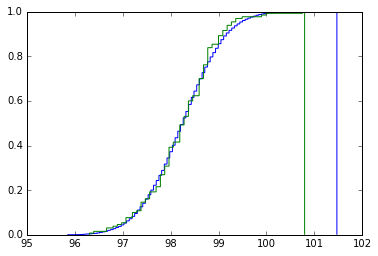

In [47]:
mean_temperature = describe_stats.loc['mean','temperature']
std_temperature = describe_stats.loc['std','temperature']

normal_random_samples = np.random.normal(loc=mean_temperature, scale=std_temperature, size=10000)

_ = plt.hist(normal_random_samples, normed=True, cumulative=True, bins=100, histtype='step')

empirical_data = df.temperature.values
_ = plt.hist(empirical_data, cumulative=True, normed=True, bins=100, histtype='step')
plt.show()

As shown by the CDF, the temperature very closely approximates a normal distribution. We can also look at histogram or do a  normalty test using stats.mstats.normaltest.

# Answer 2

Is the sample size large? Are the observations independent? 
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 


The sample size is n=130 > 30 typically required for meeting the large sample size condition.

The temperature is obtained for n=130 << 10% of the total population of people. Therefore, the observations can be considered independent.

# Answer 3

<ol>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
    
</ol>

### Bootstrap approach

In [48]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [49]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


H0: The mean temperature is 98.6

Ha: The mean temperature is not 98.6

Assuming that the null hypothesis is true

In [50]:
start_time = time.time()

shifted_empirical_data = empirical_data - mean_temperature + 98.6
temp_bs_replicates = draw_bs_reps(shifted_empirical_data, np.mean, size = 10000)

p = np.sum(temp_bs_replicates <= mean_temperature)/ len(temp_bs_replicates)

print "My program took", time.time() - start_time, "to run"

My program took 0.381999969482 to run


In [51]:
print "p value: %1.12f " %p

p value: 0.000000000000 


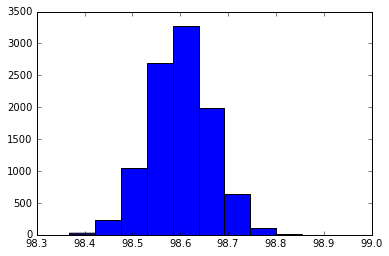

In [52]:
minimum_temperature = min(temp_bs_replicates)
mean_temperature

plt.hist(temp_bs_replicates)
plt.show()

In [53]:
print(minimum_temperature)
print(mean_temperature)
print(np.sum(temp_bs_replicates <= mean_temperature))
high_limit = 98.6 - mean_temperature+98.6
print(high_limit)
print(max(temp_bs_replicates))

print(np.sum(temp_bs_replicates >= high_limit))

98.3684615385
98.2492307692
0
98.9507692308
98.9084615385
0


### Frequentist approach

We will use a one-sample test because there is only one population. 

Usually t-statistic is better when the sample standard deviation is used to estimate population standard deviation. t-statistic has fatter probability tails. However, in this case, the data is normally distributed. Therefore, z-statistic is appropriate because the probability will be normally distributed. We can see below that the p-value from the z-statistic better matches the p-value from the bootstrapping approach.

Since p value < alpha, we reject the null hypothesis. The true temperature is not 98.6 C

In [54]:
std_sampling_distribution = std_temperature/np.sqrt(len(empirical_data))

t_statistic = (98.6 - mean_temperature)/std_sampling_distribution

degrees_of_freedom = len(empirical_data) -1


In [55]:
print("t_statistic: ", t_statistic)
print("degrees_of_freedom: ", degrees_of_freedom)
print("std_sampling_distribution", std_sampling_distribution)
print("std_temperature", std_temperature)

('t_statistic: ', 5.4548232923645195)
('degrees_of_freedom: ', 129)
('std_sampling_distribution', 0.064304416837891024)
('std_temperature', 0.73318315803894563)


In [56]:
# t_statistic = 3.174
pval = scipy.stats.t.sf(np.abs(t_statistic), degrees_of_freedom)*2  # two-sided pvalue = Prob(abs(t)>tt)
print 't-statistic = %6.3f pvalue = %6.9f' % (t_statistic, pval)


AttributeError: 'module' object has no attribute 'stats'

In [57]:
z_statistic = (98.6 - mean_temperature)/std_sampling_distribution

2*scipy.stats.norm.sf(z_statistic)

AttributeError: 'module' object has no attribute 'stats'

# Answer 4

Draw a small sample of size 10 from the data and repeat both frequentist tests. 
Which one is the correct one to use? 
What do you notice? What does this tell you about the difference in application of the 
t
and 
z
statistic? 

In [ ]:
small_sample = np.random.choice(empirical_data, size=10)

In [ ]:
mean_small_sample = np.mean(small_sample)
mean_small_sample

In [ ]:
std_small_sample = np.std(small_sample)
std_small_sample

In [ ]:
n = len(small_sample)
n

In [ ]:
std_small_sampling_distribution = std_small_sample/np.sqrt(len(small_sample))

t_statistic = (98.6 - mean_small_sample)/std_small_sampling_distribution
degrees_of_freedom = n - 1
t_statistic

In [ ]:
pval = scipy.stats.t.sf(np.abs(t_statistic), degrees_of_freedom)*2  # two-sided pvalue = Prob(abs(t)>tt)
print 't-statistic = %6.3f,  pvalue = %6.9f' % (t_statistic, pval)

In [ ]:
z_statistic = (98.6 - mean_small_sample)/std_small_sampling_distribution

2*scipy.stats.norm.sf(z_statistic)

t statistic has fatter tail. If the probability of occurance is small and the true population standard deviation is unknown, then its better to use t-stastic 


# Answer 5

At what temperature should we consider someone's temperature to be "abnormal"? 
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

In [ ]:
np.std(temp_bs_replicates)

In [ ]:
std_sampling_distribution

In [ ]:
std_temperature

Lets assume that we are looking for a 95% confidence interval

In [ ]:
z_statistic_95CI = scipy.stats.norm.ppf(0.975)

In [ ]:
confidence_interval = [mean_temperature - z_statistic_95CI * std_temperature, mean_temperature + z_statistic_95CI * std_temperature]

confidence_interval

### Bootstrapping approach

In [ ]:
temp_bs_replicates_95CI = np.random.choice(empirical_data, size=100000)

np.percentile(temp_bs_replicates_95CI, [2.5, 97.5])

In [ ]:
mean_temperature

In [61]:
import scipy
scipy.__version__

'0.17.1'

In [ ]:
scipy.

In [60]:
scipy.stats.norm.ppf(0.975)

AttributeError: 'module' object has no attribute 'stats'

In [58]:
scipy.stats.norm.sf(1.959963984540054)

AttributeError: 'module' object has no attribute 'stats'

In [ ]:
scipy.stats.norm.cdf(1.959963984540054)

# Answer 6

Is there a significant difference between males and females in normal temperature? 
What testing approach did you use and why? 
Write a story with your conclusion in the context of the original problem. 

In [ ]:
empirical_data_male = df[df.gender == 'M'].temperature.values
empirical_data_female = df[df.gender == 'F'].temperature.values

In [ ]:
empirical_data_male

In [ ]:
empirical_data_female

In [ ]:
def diff_of_means(data_male, data_female):
    return np.mean(data_male) - np.mean(data_female)

In [ ]:
diff_of_means(empirical_data_male, empirical_data_female)

In [ ]:
temp_bs_replicates_95CI_male = draw_bs_reps(empirical_data_male, np.mean, size=10000)
temp_bs_replicates_95CI_female = draw_bs_reps(empirical_data_female, np.mean, size=10000)